# <span class="bg-primary"> 6. OC - NETTOYER JEU DES DONNEES</span>

In [195]:
# Chargement des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

# <span class="bg-info">6.1. Téléchargez les données</span>

In [196]:
# Chargement du jeu de données
data_path = 'C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-6-NETTOYER_JEU_DONNEES/'
data = pd.read_csv(data_path + 'operations.csv', parse_dates=[1,2])
# data = pd.read_csv("operations.csv",parse_dates=[1,2],header = None)
# data = pd.read_csv("operations.csv",parse_dates=[1,2],sep= ';',
#     decimal= ',', dayfirst=True)

In [9]:
data

,identifiant_transaction,date_operation,date_valeur,libelle,debit,credit,solde
0,242,2023-10-06,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,NaN,2513.79
1,25,2023-10-06,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,NaN,2529.29
2,69,2023-10-06,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,NaN,2515.71
3,299,2023-10-05,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,NaN,2539.29
4,45,2023-10-05,2023-10-05,CARTE XX XX XX XX,-4.80,NaN,2549.93
...,...,...,...,...,...,...,...
303,295,2023-04-03,2023-04-03,CARTE XX XX RAPT XX,-73.00,NaN,2221.01
304,221,2023-04-03,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,NaN,676.0,2294.01
305,205,2023-04-03,2023-04-03,VIREMENT XX XX XX XX XX XX,NaN,4.8,1618.01
306,50,2023-04-03,2023-04-03,CARTE XX XX XX XX,-14.39,NaN,1613.21


In [10]:
data.columns

Index(['identifiant_transaction', 'date_operation', 'date_valeur', 'libelle',
       'debit', 'credit', 'solde'],
      dtype='object')

In [11]:
# pour renommer les colonnes
# data.columns = ['identifiant_transaction','date_operation','date_valeur',
#                 'libelle','debit','credit','solde']

In [13]:
# Colonne libelle : quelles sont les 100 opérations les plus fréquentes?
from collections import Counter

def most_common_words(labels):
    words = []
    for lab in labels:
        words += lab.split(" ")
    counter = Counter(words)
    for word in counter.most_common(100):
        print(word)

most_common_words(data['libelle'].values)

('XX', 1428)
('CARTE', 247)
('VIREMENT', 29)
('LES', 20)
('ANCIENS', 20)
('ROBINSON', 20)
('CHEZ', 16)
('LUC', 16)
('LA', 16)
("L'EPICERIE", 16)
('DEMBAS', 16)
('TOUPTIPRI', 12)
('CCNCF', 9)
('RETRAIT', 9)
('PRELEVEMENT', 8)
('RAPT', 8)
('FORFAIT', 7)
('COMPTE', 7)
('SUPERBANK', 7)
('TELEPHONE', 7)
('DON', 7)
('LOUVE', 7)
('PERMANENT', 6)
('LOYER', 6)
('VELOC', 4)


In [14]:
# Création de 2 variables dictionnaires

CATEGS = {
    'LOYER': 'LOYER',
    'FORFAIT COMPTE SUPERBANK': 'COTISATION BANCAIRE',
    'LES ANCIENS ROBINSON': 'COURSES',
    "L'EPICERIE DENBAS": 'COURSES',
    'TELEPHONE': 'FACTURE TELEPHONE',
    'LA CCNCF': 'TRANSPORT',
    'CHEZ LUC': 'RESTAURANT',
    'RAPT': 'TRANSPORT',
    'TOUPTIPRI': 'COURSES',
    'LA LOUVE': 'COURSES',
    'VELOC': 'TRANSPORT'
}

TYPES = {
    'CARTE': 'CARTE',
    'VIR': 'VIREMENT',
    'VIREMENT': 'VIREMENT',
    'RETRAIT': 'RETRAIT',
    'PRLV': 'PRELEVEMENT',
    'DON': 'DON',
}

In [16]:
# Variables de paramétrages
LAST_BALANCE = 2400 # Solde du compte APRES la dernière opération en date
EXPENSES = [80,200] # Bornes des catégories de dépense : petite, moyenne et grosse
WEEKEND = ["Saturday","Sunday"] # Jours non travaillés
# les jours possibles :
#  ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [18]:
# Controle des noms des colonnes
for c in ['date_operation','libelle','debit','credit']:
    if c not in data.columns:
        if (c in ['debit','credit'] and 'montant' not in data.columns) or \
        (c not in ['debit','credit']):
            msg = "Il vous manque la colonne '{}'. Attention aux majuscules "
            msg += "et minuscules dans le nom des colonnes!"
            raise Exception(msg.format(c))

In [19]:
data.columns

Index(['identifiant_transaction', 'date_operation', 'date_valeur', 'libelle',
       'debit', 'credit', 'solde'],
      dtype='object')

In [20]:
# Suppression des colonnes innutiles : identifiant_transaction, 
# date_valeur et solde
for c in data.columns:
    if c not in ['date_operation','libelle','debit','credit','montant']:
        del data[c]

In [21]:
data.columns

Index(['date_operation', 'libelle', 'debit', 'credit'], dtype='object')

In [22]:
# Ajout de la colonne 'montant' si besoin débit + crédit
if 'montant' not in data.columns:
    data["debit"] = data["debit"].fillna(0)
    data["credit"] = data["credit"].fillna(0)
    data["montant"] = data["debit"] + data["credit"]
    del data["credit"], data["debit"]

In [23]:
# creation de la variable 'solde_avt_ope'
data = data.sort_values("date_operation")
amount = data["montant"]
balance = amount.cumsum()
balance = list(balance.values)
last_val = balance[-1]
balance = [0] + balance[:-1]
balance = balance - last_val + LAST_BALANCE
data["solde_avt_ope"] = balance

In [24]:
# Assignation des operations a une categorie et a un type
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "AUTRE"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result

data["categ"] = detect_words(data["libelle"], CATEGS)
data["type"] = detect_words(data["libelle"], TYPES)

In [25]:
# creation des variables 'tranche_depense' et 'sens'
def expense_slice(value):
    value = -value # Les dépenses sont des nombres négatifs
    if value < 0:
        return "(pas une dépense)"
    elif value < EXPENSES[0]:
        return "petite"
    elif value < EXPENSES[1]:
        return "moyenne"
    else:
        return "grosse"
    
data["tranche_depense"] = data["montant"].map(expense_slice)
data["sens"] = ["credit" if m > 0 else "debit" for m in data["montant"]]

In [28]:
# Creation des autres variables
data["annee"] = data["date_operation"].map(lambda d: d.year)
data["mois"] = data["date_operation"].map(lambda d: d.month)
data["jour"] = data["date_operation"].map(lambda d: d.day)
data["jour_sem"] = data["date_operation"].map(lambda d: d.day_name())
data["jour_sem_num"] = data["date_operation"].map(lambda d: d.weekday()+1)
data["weekend"] = data["jour_sem"].isin(WEEKEND)
data["quart_mois"] = [int((jour-1)*4/31)+1 for jour in data["jour"]]

In [29]:
data.columns

Index(['date_operation', 'libelle', 'montant', 'solde_avt_ope', 'categ',
       'type', 'tranche_depense', 'sens', 'annee', 'mois', 'jour', 'jour_sem',
       'jour_sem_num', 'weekend', 'quart_mois'],
      dtype='object')

In [30]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ,type,tranche_depense,sens,annee,mois,jour,jour_sem,jour_sem_num,weekend,quart_mois
307,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE,DON,petite,debit,2023,3,31,Friday,5,False,4
302,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT,CARTE,petite,debit,2023,4,3,Monday,1,False,1
303,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT,CARTE,petite,debit,2023,4,3,Monday,1,False,1
306,2023-04-03,CARTE XX XX XX XX,-14.39,1416.81,AUTRE,CARTE,petite,debit,2023,4,3,Monday,1,False,1
305,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,1402.42,AUTRE,VIREMENT,(pas une dépense),credit,2023,4,3,Monday,1,False,1


In [31]:
# Enregistrement au format CSV
data.to_csv("operations_enrichies.csv",index=False)

# <span class="bg-info">6.2. Découvrez les 4 types de variables </span>

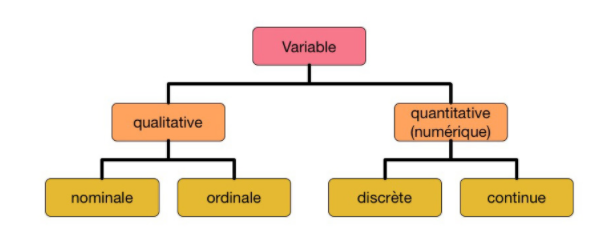

## VARIABLES QUANTITATIVES

In [32]:
# VARIABLES QUANTITATIVES : un nombre exprimant une quantité sur lequel on
# peut faire des opérations mathématiques

## VARIABLES QUANTITATIVES DISCRETES

In [ ]:
# VARIABLES QUANTITATIVES DISCRETES : nombre de variables limitées, 
# s'arrête un jour (ex : montant de dépenses ... pas infini)

## VARIABLES QUANTITATIVES CONTINUES

In [ ]:
# VARIABLES QUANTITATIVES CONTINUES : nombre de valeurs possibles et
# probables très grandes et peut prendre de nombreuses valeurs

## VARIABLES QUALITATIVES

In [ ]:
# VARIABLES QUALITATIVES : contiennent des catégories (ou modalités)
#  soit sous forme littérale (mots) ou numérique (ex : arrondissement)

## VARIABLES QUALITATIVES ORDINALES

In [ ]:
# VARIABLES QUALITATIVES ORDINALES : si la catégorie peut être ordonnée
# et que ça a un sens (ex : tranche_depense, petite, moyenne et grande)

## VARIABLES QUALITATIVES NOMINALES

In [33]:
# VARIABLES QUALITATIVES NOMINALES : si on trie, ça n'a pas de sens
# (ex : identifiant d'une opération)

## VARIABLES QUALITATIVES DICHOTOMIQUES 

In [34]:
# VARIABLES QUALITATIVES DICHOTOMIQUES : ne prennent que 2 valeurs (ex:
# O (oui) ou N (non)

## DATES = QUALITATIVES ORDINALES

In [35]:
# dates stockées sous forme de nombres entiers (timestamp= nbre de seconde 
# depuis le 01/01/1970) mais additionner des timestamps n'a pas de sens)

# <span class="bg-info">6.3. Représentez la distribution empirique d'une variable</span>

In [37]:
# modalités = differentes possibilités qu'on peut observer pour la variable
# qualitative
# valeurs = differentes possibilités qu'on peut observer pour la variable 
# quantitative
# effectif = le nombre de fois qu'on rencontre la modalité
# fréquence = effectif/n=nombre d'individus de l'échantillon
# distribution empirique = La distribution empirique d'une variable, 
# c'est l’ensemble des valeurs (ou modalités) prises par cette variable, 
# ainsi que leurs effectifs associés.
# fréquence cumulée : pour variable quantitatve = c'est juste la somme des 
# fréquences de toutes les modalités inférieures ou égales à ai . 
# On la note F .

## REPRESENTER VARIABLE QUALITATIVE

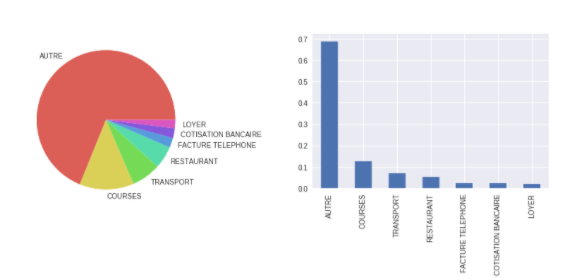

In [ ]:
# pie chart = diagramme en camembert
# chaque angle est proportionnel à l'effectif de chaque modalités

In [ ]:
# bar chart = diagramme en tuyaux d'orgue
# la hauteur des tuyaux est égale à l'effectif de chaque modalité 
# OU à la fréquence de chaque modalités (au choix)

In [ ]:
# Si la variable est qualitative ordinale, alors il suffit de classer sur 
# le graphique les modalités en ordre croissant.

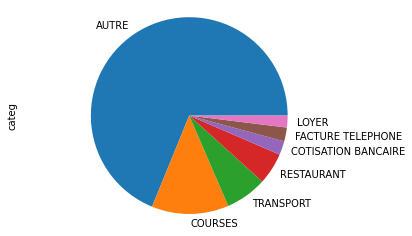

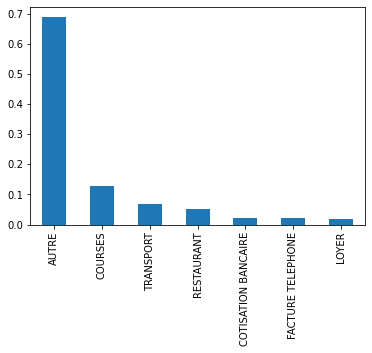

In [42]:
# VARIABLE QUALITATIVE
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# value_counts() :somme du nbre des apparitions par modalité
# normalize=True : on veut obtenir les fréquences => distribution empirique

# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

## REPRESENTER VARIABLE QUANTITATIVE

## VARIABLE QUANTITATIVE DISCRETE

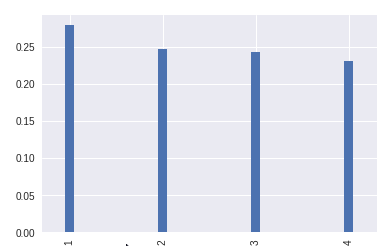

In [ ]:
# Diagramme en bâtons

## VARIABLE QUANTITATIVE CONTINUE

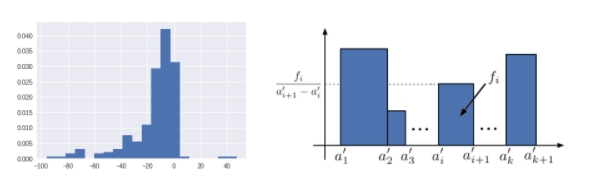

In [ ]:
# On dit alors que l'on agrège des valeurs en classes.
# Le fait d'agréger une variable s'appelle la discrétisation (en anglais :
# binning, bucketing ou discretization).
# HISTOGRAMME : les valeurs sont agrégées(chaque bâton représente un
# intervalle)
# L'effectif de la classe ne sera plus représenté par la hauteur du 
# rectangle, mais par sa surface. Cela est dû au fait que les classes 
# n'ont pas forcément la même largeur.

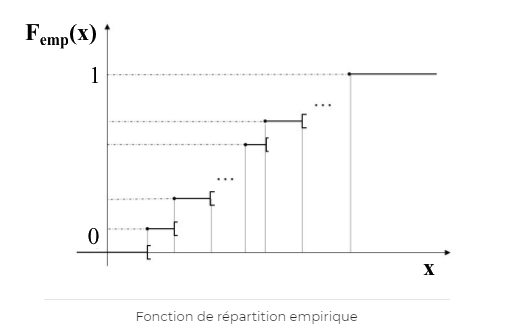

In [39]:
# Si cependant, vous ne souhaitez pas agréger les valeurs, il existe une 
# autre solution : représenter la fonction de répartition empirique. 
# Il faut vous la représenter comme un escalier. 
# Pour la représenter, on parcourt l'axe horizontal des petites valeurs 
# vers les grandes valeurs. A chaque fois que l'on rencontre une valeur 
# qui est présente dans notre échantillon, on monte d'une marche. 
# Il y aura donc autant de marches que de valeurs, et d'ailleurs autant 
# que d'individus. Toutes les marches ont la même hauteur.

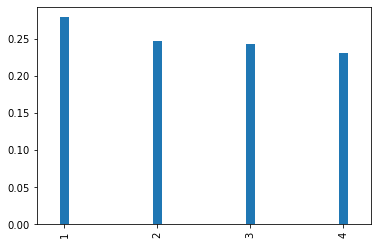

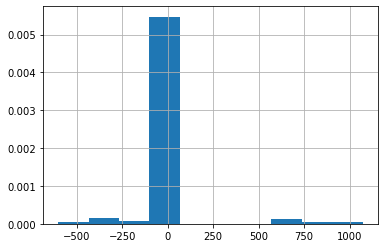

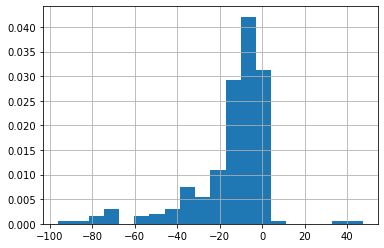

In [43]:
# VARIABLE QUANTITATIVE
# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

# Histogramme : très étalé
data["montant"].hist(density=True)
plt.show()
# Histogramme plus beau :moins étalé doncon filtre entre -100 et 100
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

# <span class="bg-info">6.4. Présentez une variable sous forme de tableau</span>

 ## VARIABLES QUALITATIVES

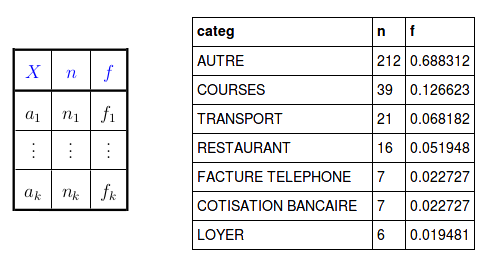

## VARIABLES QUANTITATIVES

## VARIABLES QUANTITATIVES DISCRETES

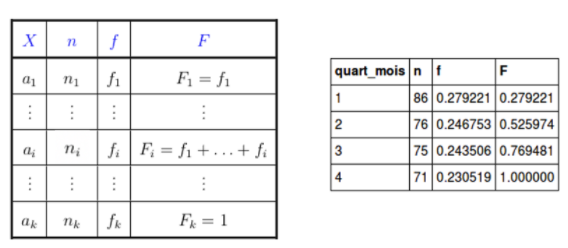

## VARIABLES QUANTITATIVES CONTINUES

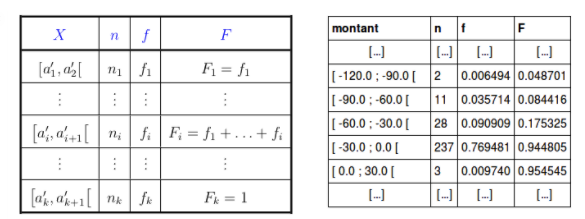

In [47]:
effectifs = data["quart_mois"].value_counts() #Séries pandas index + valeurs
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
# effectifs
tab["n"] = effectifs.values
# Fréquence : effectif/population
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
# Fréquence cumulée
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

# afficher le tableau
tab

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


# <span class="bg-info">6.5. Laissez-vous guider par les indicateurs</span>

In [ ]:
# STATISTIQUE : un indicateur numérique calculé à partir d'un échantillon. 
# STATISTIQUE : un indicateur, plus ou moins efficace, d'une certaine propriété
#               d'un échantillon.
# STATISTIQUE = donnée statistique, indicateur statistique, mesure statistique

In [ ]:
# INDICE STATISTIQUE : un indice statistique, c'est une statistique construite 
# à partir d'une certaine vision, à partir de connaissances d'un domaine 
# (par ex : l'économie). En quelques sortes, un indice est une statistique 
# "entourée" d'une certaine philosophie.

In [ ]:
# INDICATEUR : neutre pas comme l'indice statistique

# <span class="bg-info">6.6. Découvrez les mesures de tendance centrale</span>

## ANALYSE UNIVARIEE

In [ ]:
# analyse univariée = analyse d'une variable à la fois

## MESURES DE TENDANCE CENTRALE

## LE MODE

In [ ]:
# lE MODE = une mesure de tendance centrale : modalité (variable qualitative) 
# ou valeur la plus fréquente (variable quantitative)
# CLASSE MODALE : var quant continue, classe(tranche) la plus fréquente 

In [54]:
data['montant'].mode() # Series pandas

0   -1.6
dtype: float64

## LA MOYENNE

In [ ]:
# MOYENNE = somme de toutes les valeurs divisée par la population
# sensible aux outliers

In [53]:
data['montant'].mean() # valeur

2.872564935064941

## LA MEDIANE

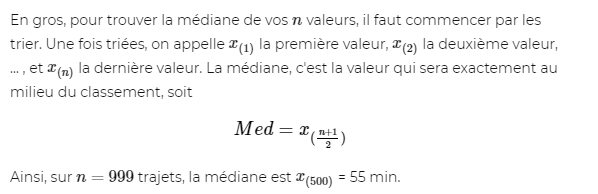

In [ ]:
# MEDIANE = valeur au dessous de laquelle on trouve 50% des valeurs 
#           et 50% au desus
# on trie les valeurs

In [55]:
data['montant'].median() # valeur

-9.6

## CALCULER TOUTES LES VALEURS CENTRALES

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
dtype: float64


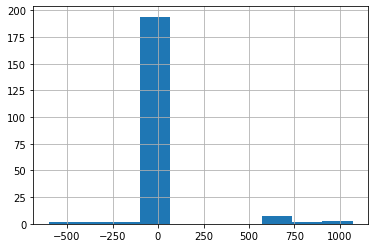

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
dtype: float64


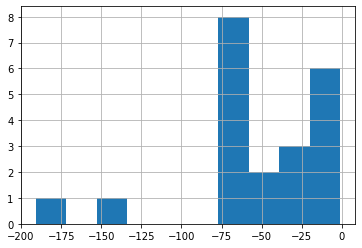

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
dtype: float64


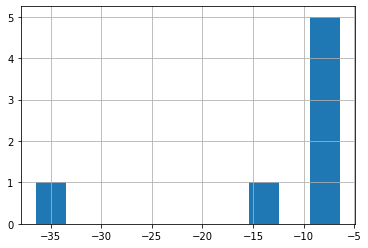

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64


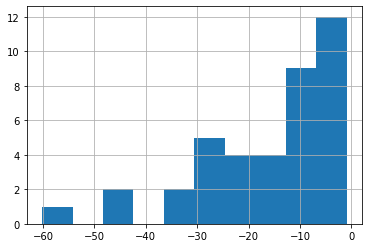

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
dtype: float64


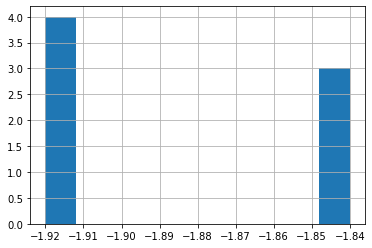

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
dtype: float64


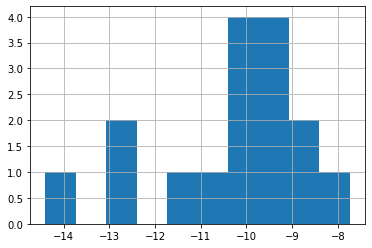

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
dtype: float64


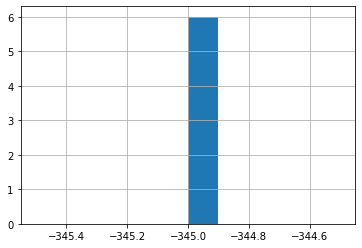

In [57]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    subset["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

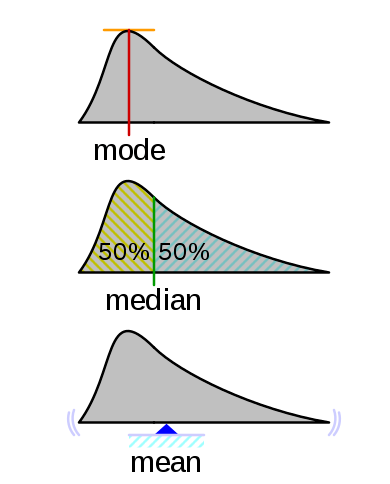

## DITRIBUTION PLURIMODALES

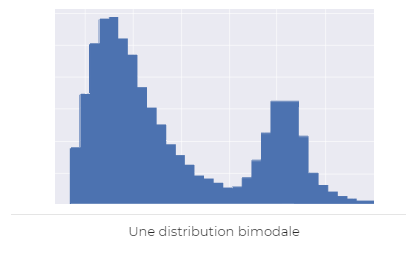

# <span class="bg-info">6.7. Comprenez les mesures de dispersion</span>

In [ ]:
# MESURE DE DISPERSION : écart d'une valeur par rapport à la moyenne

In [ ]:
# VARIANCE EMPIRIQUE : somme (des écarts entre la valeur et la moyenne) au carré
#                      divisé par la population
# VARIANCE EMPIRIQUE : codé var()
# VARIANCE EMPIRIQUE : un estimateur biaisé de la variance de la variable 
#                      aléatoire ==> moins juste que VARIANCE THEORIQUE.

In [ ]:
# VARIANCE EMPIRIQUE CORRIGEE : VARIANCE THEORIQUE
# VARIANCE EMPIRIQUE CORRIGEE : un estimateur sans biais 
# VARIANCE EMPIRIQUE CORRIGEE : VARIANCE EMPIRIQUE SANS BIAIS
# VARIANCE EMPIRIQUE CORRIGEE : (population/(population-1))*VARIANCE EMPIRIQUE

In [ ]:
# ECART-TYPE EMPIRIQUE = racine carrée de la VARIANCE EMPIRIQUE
# ECART-TYPE EMPIRIQUE = STANDARD DEVIATION en anglais
# ECART-TYPE EMPIRIQUE : codé std()

In [ ]:
# COEFFICIENT DE VARIATION : écart-type de 6 minutes sur 1 trajet de 1 heure
# n'est pas la meme chose que sur la moyenne qui est de 24h ==> nouveau coef
# COEFFICIENT DE VARIATION : écart-type empirique divisé par moyenne

In [ ]:
# MEDIANE = valeur au dessous de laquelle se trouve la moitié des valeurs

In [ ]:
# ECART INTER-QUARTILLES : différence entre troisième quartile 
#                          et premier quartile
# PREMIER QUARTILE : valeur au dessous de laquelle se trouve 1/4 des valeurs
#                    et 3/4 au dessus = QUANTILE D'ORDRE 0.25
# DEUXIEME QUARTILE : valeur au dessous de laquelle se trouve 2/4 des valeurs
#                    et 2/4 au dessus ==> = LA MEDIANE = QUANTILE D'ORDRE 0.5
# TROISIEME QUARTILE : valeur au dessous de laquelle se trouve 3/4 des valeurs
#                      et 1/4 au dessus = QUANTILE D'ORDRE 0.75
# DECILE = QUANTILLE d'ordre 0.1, 0.2 ...
# CENTILE = QUANTILLE d'ordre 0.01, 0.02 ... nommé aussi PERCENTILE

In [ ]:
# ECART MOYEN ABSOLU : EMA mesure des écarts à la moyenne : (somme
# des valeurs absolues de tous les écarts à la moyenne) divisé par population

In [ ]:
# MAD = Médiane des écarts absolus par rapport à la médiane (somme
# des valeurs absolues de tous les écarts à la médiane) divisé par population

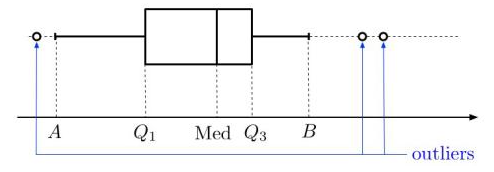

In [ ]:
# REPRESENTATION GRAPHIQUE DE LA DISPERSION 
# BOXPLOT = boîte à moustaches
# représentation empirique

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
dtype: float64
var:
 40401.82999254187
std:
 201.00206464746046
skw:
 3.1215325222336427
kur:
 12.716537970826296


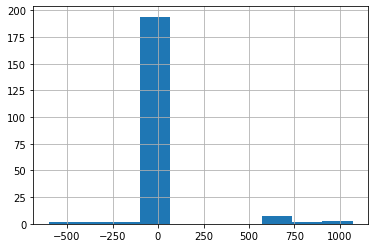

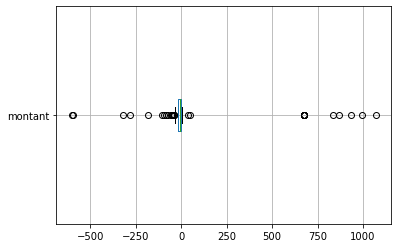

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
dtype: float64
var:
 2205.016868027212
std:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917487


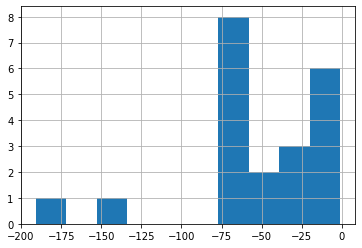

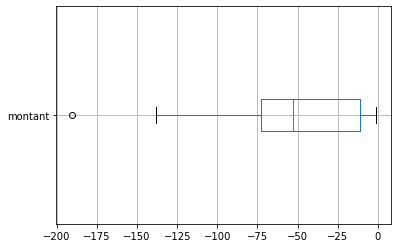

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
dtype: float64
var:
 105.01905306122445
std:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


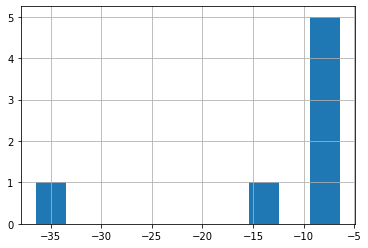

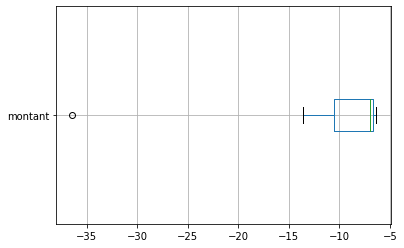

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64
var:
 177.0253547666009
std:
 13.3050875520081
skw:
 -1.246748830645698
kur:
 1.604730494087499


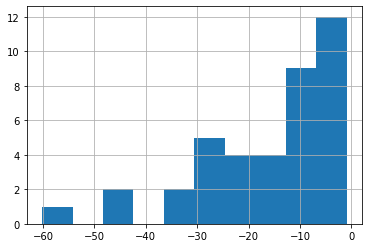

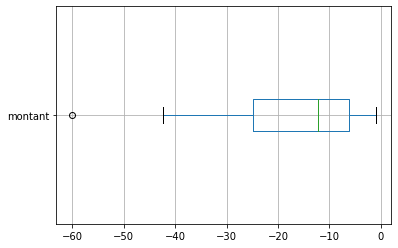

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
dtype: float64
var:
 0.0015673469387755044
std:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


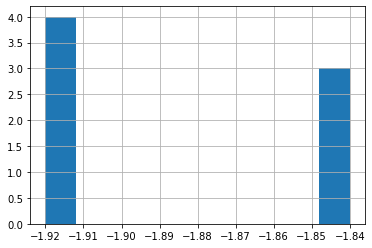

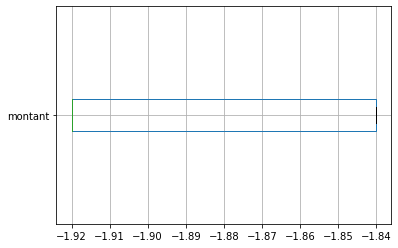

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
dtype: float64
var:
 2.853193750000001
std:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


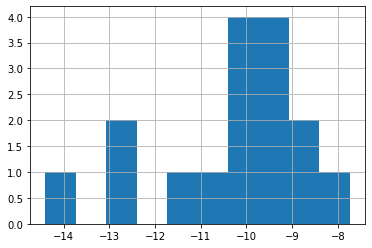

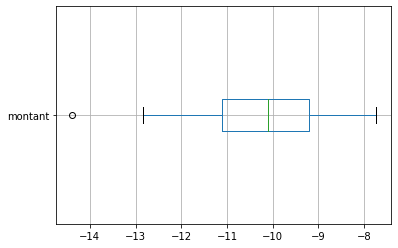

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
dtype: float64
var:
 0.0
std:
 0.0
skw:
 0
kur:
 0


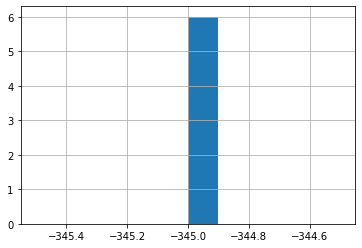

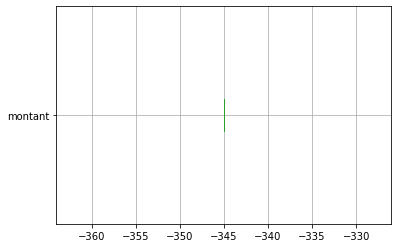

In [50]:
for cat in data["categ"].unique():
    sous_echantillon = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",sous_echantillon['montant'].mean())
    print("med:\n",sous_echantillon['montant'].median())
    print("mod:\n",sous_echantillon['montant'].mode())
    print("var:\n",sous_echantillon['montant'].var(ddof=0))
    print("std:\n",sous_echantillon['montant'].std(ddof=0))
    print("skw:\n",sous_echantillon['montant'].skew())
    print("kur:\n",sous_echantillon['montant'].kurtosis())
    sous_echantillon["montant"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    sous_echantillon.boxplot(column="montant", vert=False)
    plt.show()

# <span class="bg-info">6.8. Appréhendez les mesures de forme</span>

In [ ]:
# connaître la moyenne et l’écart-type ne suffit pas ici. Ce qu'il vous faut 
# connaître, c'est la forme de la distribution : est-ce qu'elle s'étale plutôt 
# vers la gauche ou plutôt vers la droite 
# MESURE STATISTIQUE = MESURES DE FORME

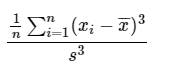

## SKEWNESS EMPIRIQUE

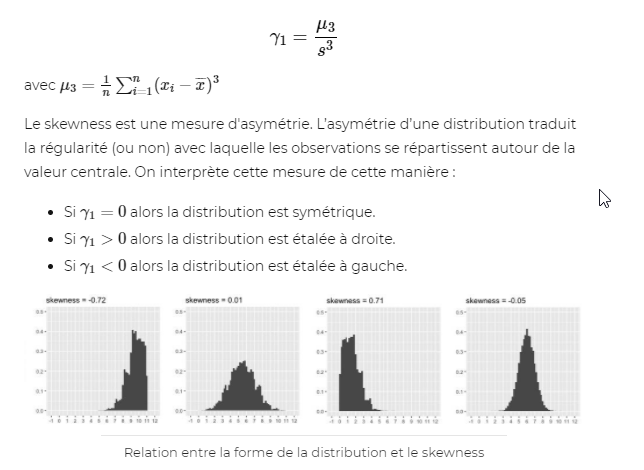

In [59]:
data['montant'].skew() # valeur

3.361845010509885

## KURTOSIS EMPIRIQUE

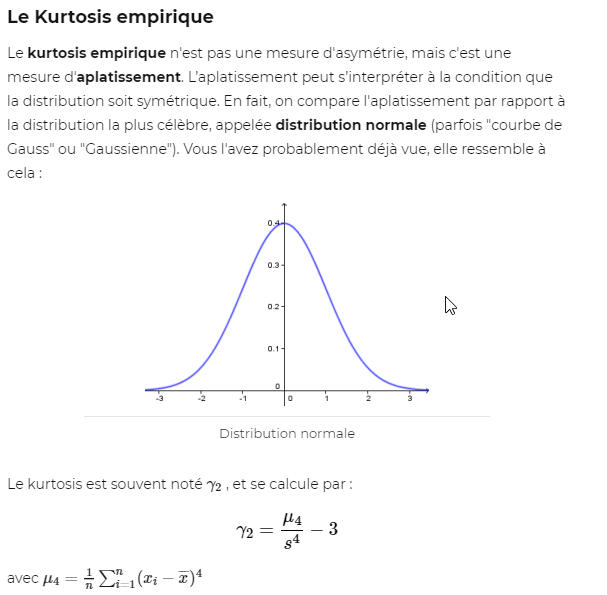

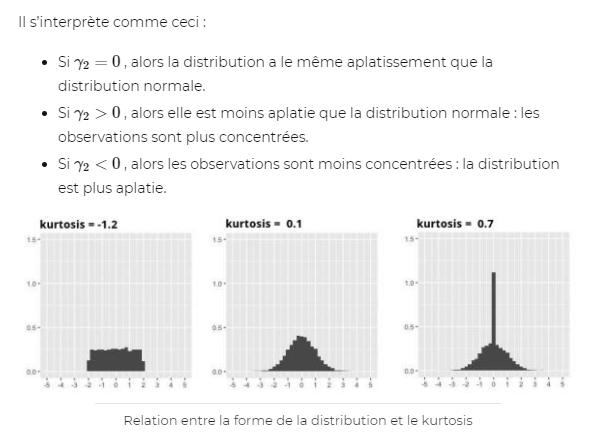

In [60]:
data['montant'].kurtosis() # valeur

17.271904828267708

## TOUTES LES MESURES STATITSTIQUES

--------------------
AUTRE
moy:
 23.433207547169832
med:
 -8.31
mod:
 0   -1.6
dtype: float64
var:
 40401.82999254187
ect:
 201.00206464746046
skw:
 3.1215325222336427
kur:
 12.716537970826296


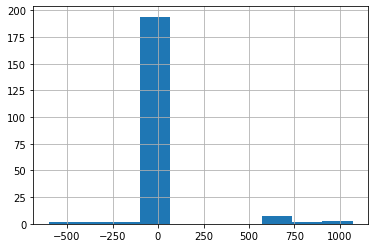

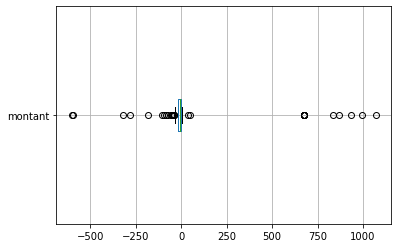

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917487


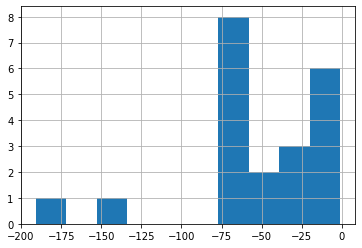

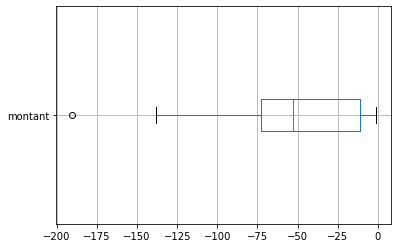

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


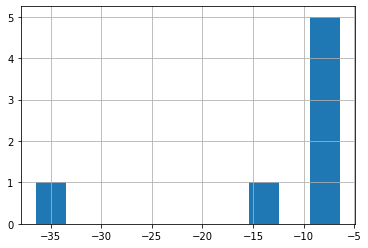

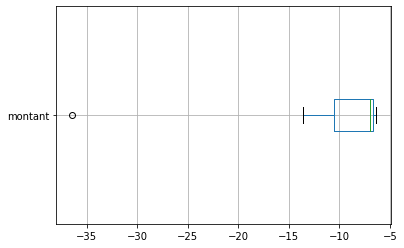

--------------------
COURSES
moy:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
dtype: float64
var:
 177.0253547666009
ect:
 13.3050875520081
skw:
 -1.246748830645698
kur:
 1.604730494087499


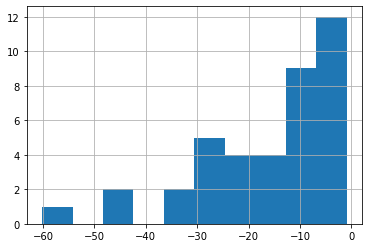

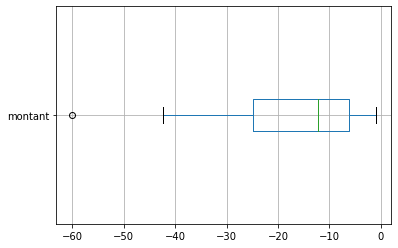

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


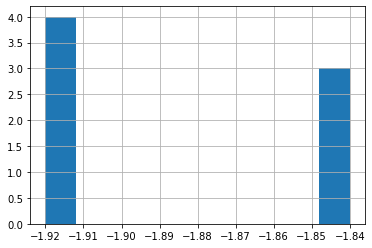

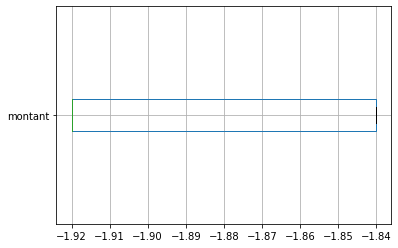

--------------------
RESTAURANT
moy:
 -10.332500000000001
med:
 -10.1
mod:
 0   -9.2
dtype: float64
var:
 2.853193750000001
ect:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


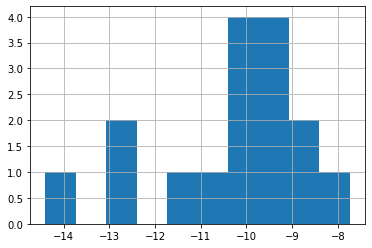

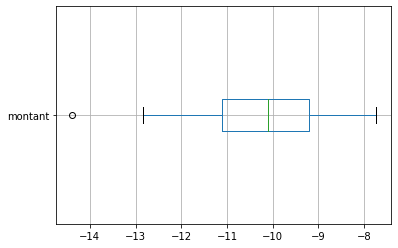

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
dtype: float64
var:
 0.0
ect:
 0.0
skw:
 0
kur:
 0


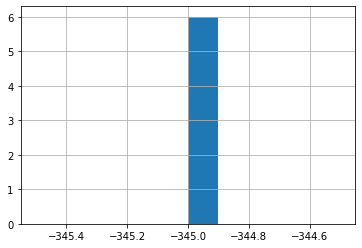

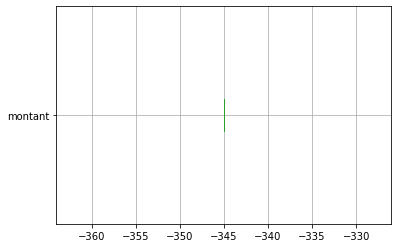

In [61]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    print("skw:\n",subset['montant'].skew())
    print("kur:\n",subset['montant'].kurtosis())
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()

## ASYMETRIE

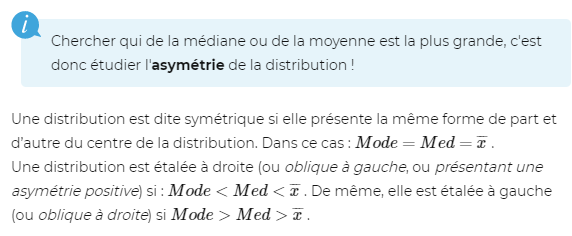

# <span class="bg-info">6.9. Familiarisez-vous avec les mesures de concentration</span>

## MESURES DE CONCENTRATION

## COURBE DE LORENTZ

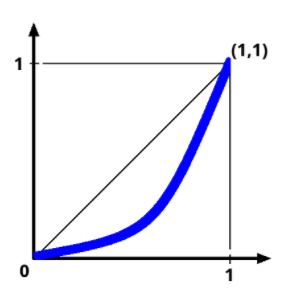

In [ ]:
# Plus la courbe de Lorenz est proche de la première bissectrice, 
# plus la répartition est égalitaire

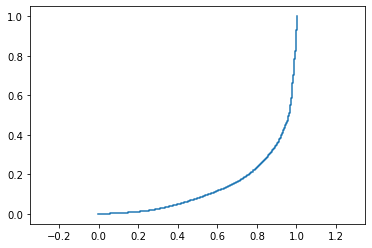

In [62]:
import numpy as np

depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

## INDICE DE GINI

In [ ]:
## INDICE DE GINI : statistique qui résume la courbe de Lorentz

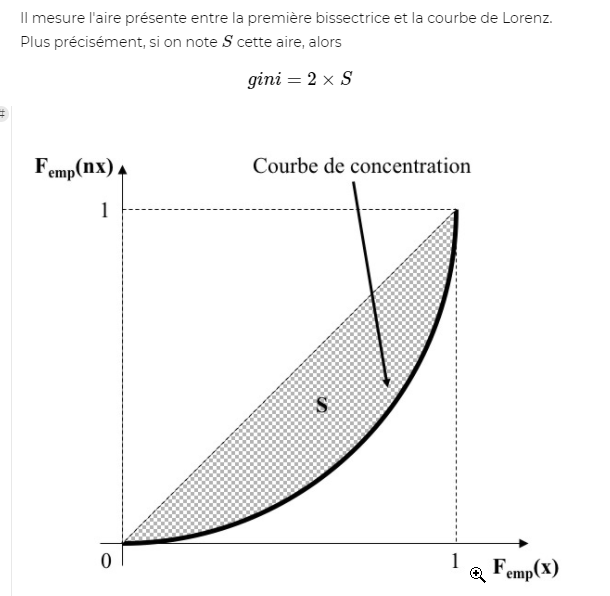

In [63]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7204386813739185

## MEDIALE

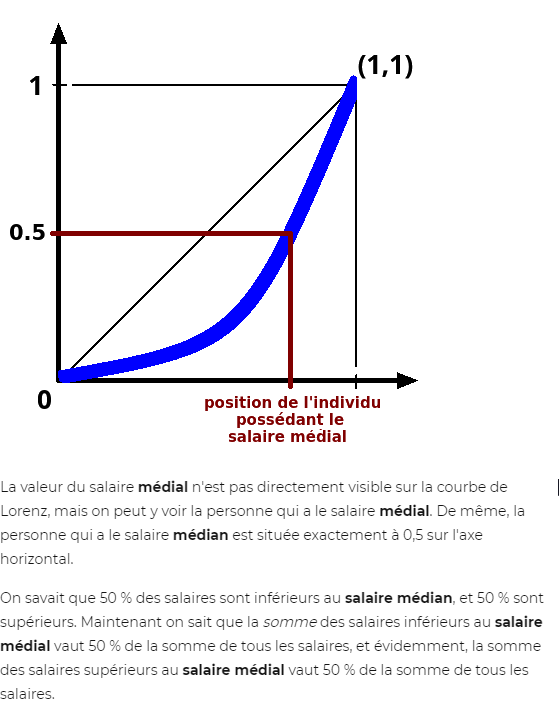

# <span class="bg-info">6.10. Abordez encore plus de mesures</span>

## TAUX DE CROISSANCE

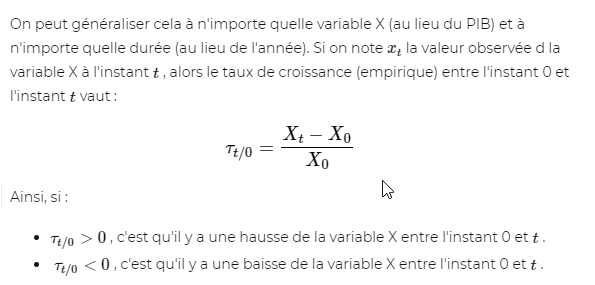

## MOYENNE GEOMETRIQUE

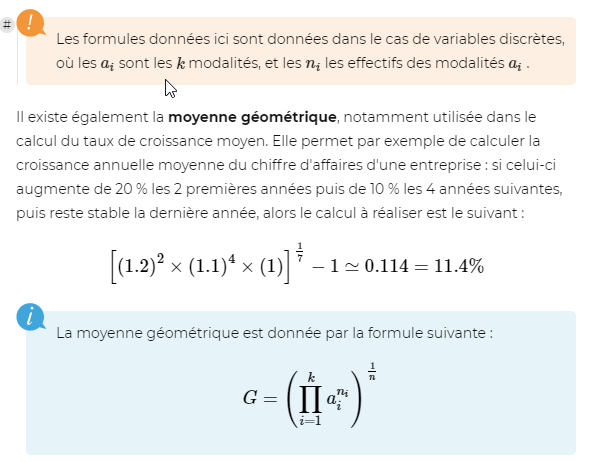

## MOYENNE HARMONIQUE

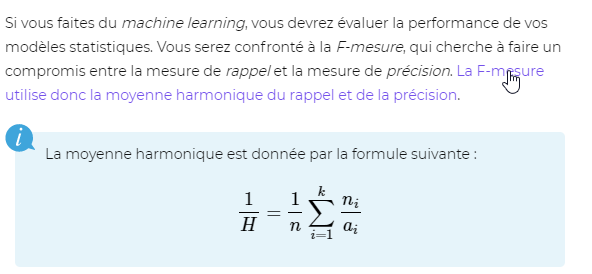

## MOYENNE QUADRATIQUE

In [64]:
# MOYENNE QUADRATIQUE : utilisée pour évaluer la performance d'un modèle 
# statistique, sous le nom de RMSE (Root Mean Square Error).

## FORMULE GENERALE D'UNE MOYENNE

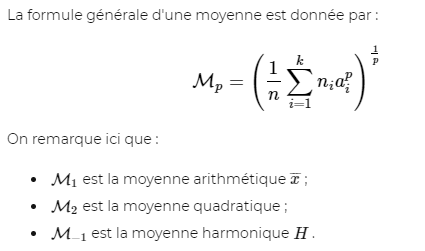

## EXERCICES

In [67]:
s = pd.Series([1,10,1,10,1,1,5,1,5,5]) 

print("moy:\n",s.mean())
print("med:\n",s.median())
print("mod:\n",s.mode())
# print("var:\n",subset['montant'].var(ddof=0))
# print("ect:\n",subset['montant'].std(ddof=0))
# print("skw:\n",subset['montant'].skew())
# print("kur:\n",subset['montant'].kurtosis())

moy:
 4.0
med:
 3.0
mod:
 0    1
dtype: int64


In [68]:
A = pd.Series([6,4,6,4,6,4,6,4]) 
B = pd.Series([1,4,1,4,1,4,1,4]) 

print("var A :\n",A.var(ddof=0))
print("var B :\n",B.var(ddof=0))

var A :
 1.0
var B :
 2.25


# <span class="bg-info">6.11. Entrez dans le monde de l’analyse bivariée</span>

## ANALYSE BIVARIEE

In [ ]:
# Analyse bivariée = étude des relations entre variables
# on obtient en général beaucoup plus d’information en étudiant les relations
# entre 2 variables qu’en étudiant séparément 2 variables *
# diagramme de dispersion ou scatter plot (en anglais)

# <span class="bg-info">6.12. Recherchez les corrélations</span>

## CORRELATION

In [ ]:
# CORRELATION = relation entre variables

## TABLEAU DE CONTINGENCE

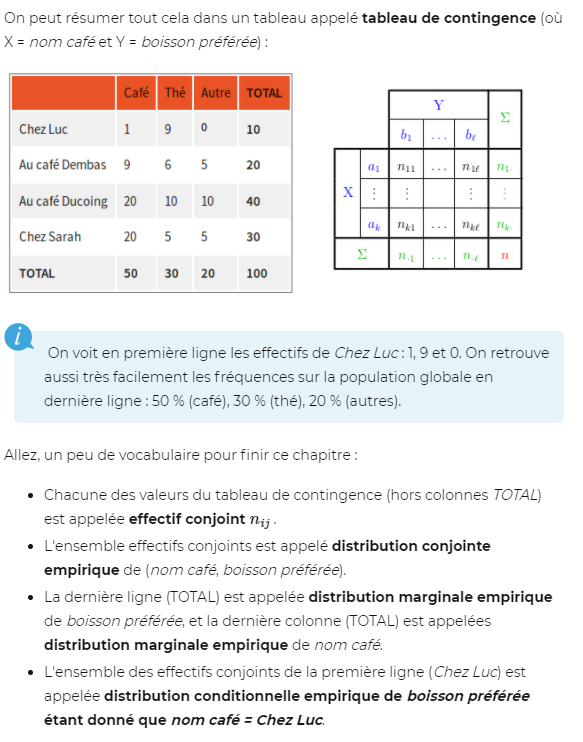

# <span class="bg-info">6.13. Analysez la corrélation entre deux variables quantitatives</span>

## 2 VARIABLES QUANTITATIVES

In [ ]:
# DIAGRAMME DE DISPERSION ou SCATTER PLOT

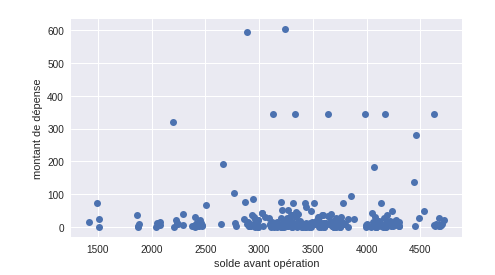

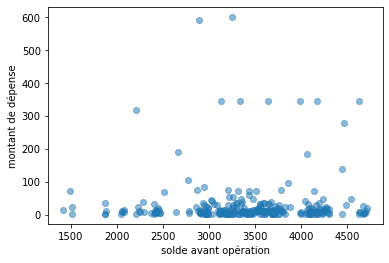

In [72]:
depenses = data[data.montant < 0]
plt.plot(depenses["solde_avt_ope"],-depenses["montant"],'o',alpha=0.5)
plt.xlabel("solde avant opération")
plt.ylabel("montant de dépense")
plt.show()

## COVARIANCE EMPIRIQUE

In [ ]:
# covariance empirique de X et Y.

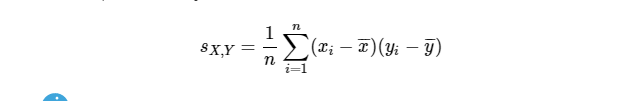

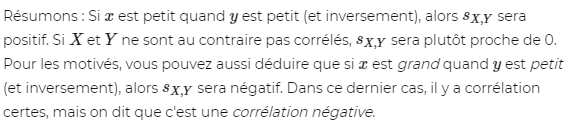

In [73]:
# calcul de la covariance empirique
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

705.0942213554406


## COEFFICIENT DE CORRELATION

In [ ]:
# r est appelé coefficient de corrélation, 
# ou coefficient de corrélation linéaire, 
# ou encore coefficient de corrélation de Pearson.
# pour être compris entre -1 et 1 on divise la covariance empirique par
# le produit des écarts types de X et Y

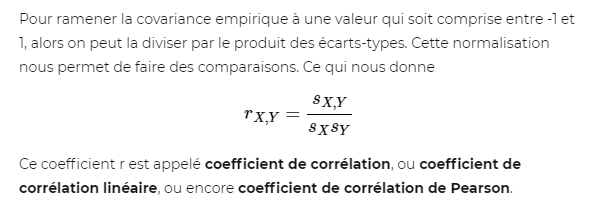

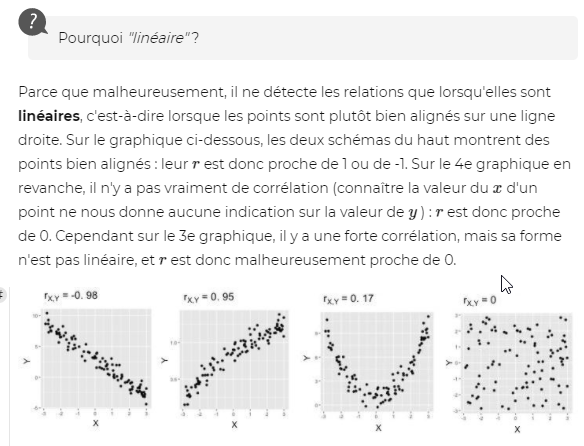

In [77]:
# calcul de coefficient de correlation ou pearson
print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])

0.014536146489774634


## ALTERNATIVE AU DIAGRAMME DE DISPERSION

In [ ]:
# Pour avoir une représentation plus efficace que le scatter plot, il est 
# possible d'agréger la variable X en abscisses (axe horizontal) en différentes
# classes. 
# Cela équivaut à "découper" au couteau le graphique précédent en tranches 
# verticales. On représente ensuite pour chaque tranche une boîte à moustaches 
# calculée à partir de tous les points présents dans la tranche.

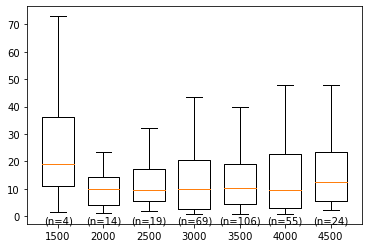

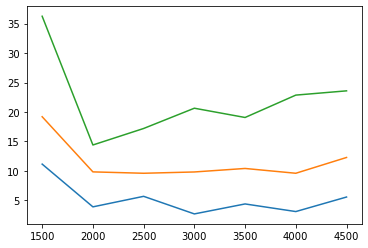

In [80]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7, # largeur graphique des boxplots
            manage_ticks= False)

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

# affichage des quartiles
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])
plt.show()

## PROPRIETES DE LA COVARIANCE EMPIRIQUE

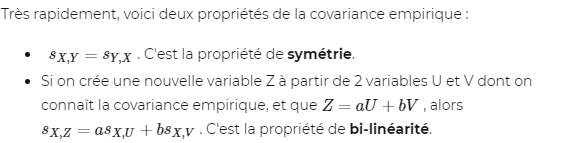

## VARIABLES QUALITATIVES

In [ ]:
# TABLEAU DE CONTINGENCE

# <span class="bg-info">6.14. Analysez deux variables quantitatives par régression linéaires</span>

## REGRESSION LINEAIRE

In [81]:
# colonne attente : délais entre 2 opérations courses
import datetime as dt

# Selection du sous-échantillon
courses = data[data.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

In [ ]:
# Modèle de régression linéaire, le but est de minimiser l'erreur epsilon
# par exemple avec la méthode des moindres carrés mais sensibles si outliers

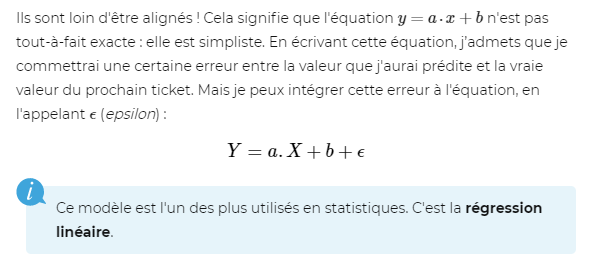

## ANALYSER LA QUALITE DU MODELE

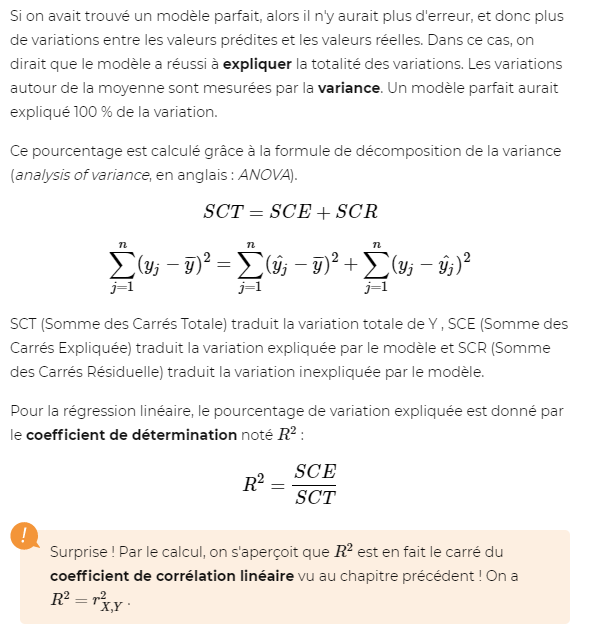

In [ ]:
# régression linéaire y= ax = b ==> estimation de a et b

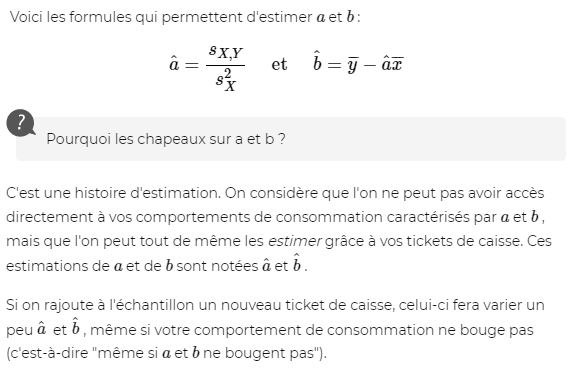

In [83]:
# estimer a et b avec du code

Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

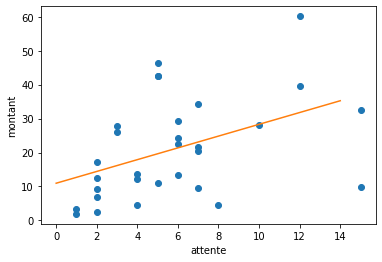

In [84]:
# afficher la dispersion et la ligne ax+b
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

## Régression linéaire sans outliers

In [86]:
courses = courses[courses.attente < 15]

attente      3.030823
intercept    5.411480
dtype: float64


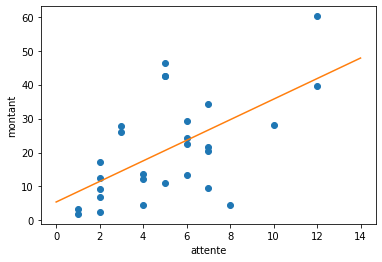

In [87]:
Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

print(result.params)

plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

# <span class="bg-info">6.15.Analysez une variable quantitative et une qualitative par ANOVA</span>

In [88]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

In [89]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

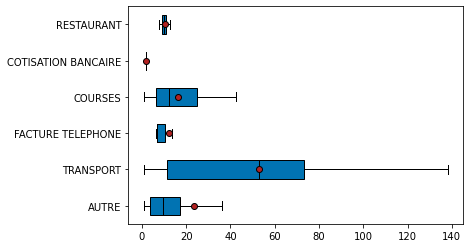

In [90]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, 
            medianprops=medianprops, vert=False, patch_artist=True, 
            showmeans=True, meanprops=meanprops)
plt.show()

## MODELISATION : ANOVA

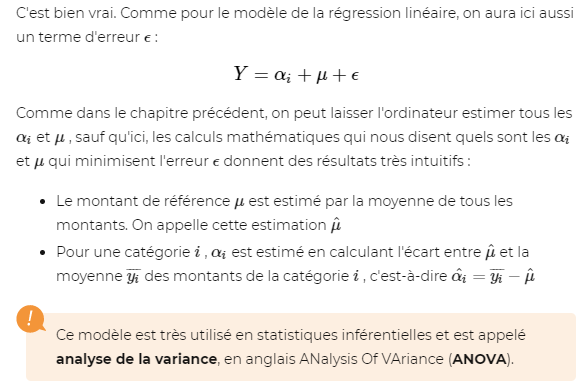

## EVALUTATION DU MODELE : eta carré

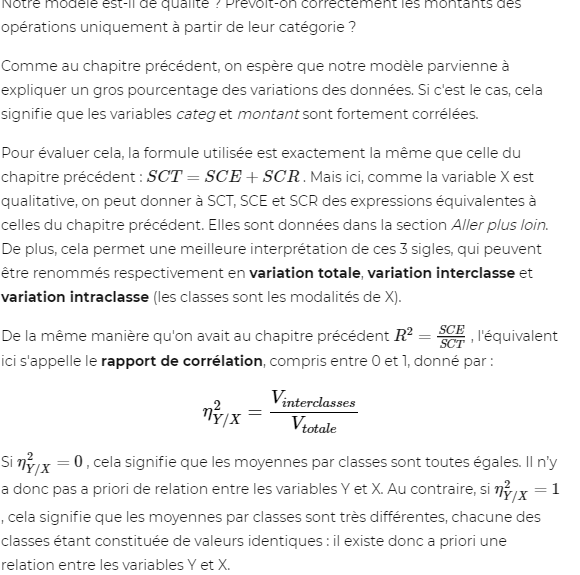

In [91]:
X = "categ" # qualitative
Y = "montant" # quantitative

sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.39841890401094926

## LES EXPRESSIONS SCT, SCE ET SCR deviennent avec 1 var quali et 1 var quanti

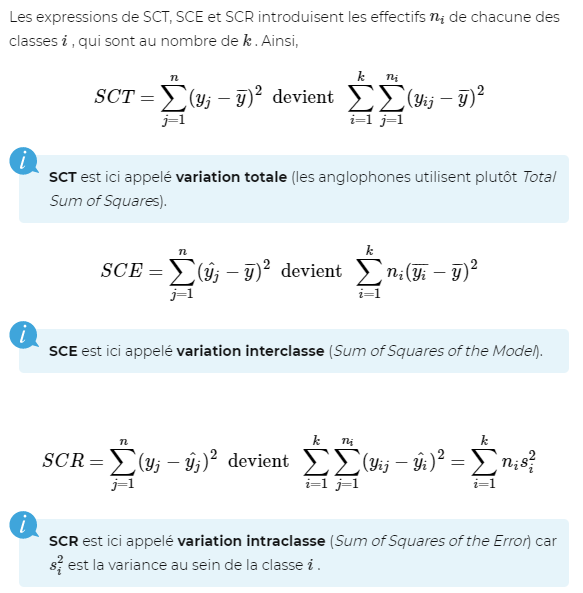

# <span class="bg-info">6.16. Analysez deux variables qualitatives avec le Chi-2</span>

## TABLEAU DE CONTINGENCE

In [93]:
X = "quart_mois"
Y = "categ"

c = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = data[X].value_counts()
ty = data[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data)
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308


## CHI-2

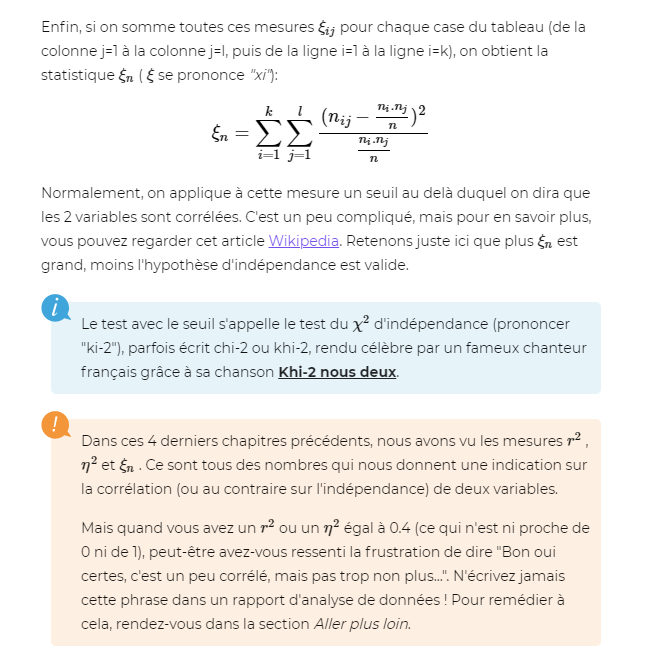

## TABLEAU DE CONTINGENCE COLORE

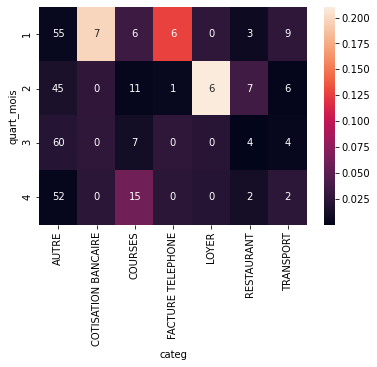

In [96]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

## C'est un peu corrélé mais pas trop

## UTILISER LES STATISTIQUES INFERENTIELLES

In [ ]:
# En fait, il existe des seuils que l'on peut calculer. 
# En dessous du seuil, on dira "Les variables ne sont pas corrélées", et au 
# dessus, on dira l'inverse.
# C'est bien plus pratique ! Mais pour être tout à fait précis, il faut donner 
# une précision supplémentaire, qui est une sorte de "niveau de certitude", que
# l'on appelle degré de significativité. On utilise pour cela la p-value, 
# exprimée en pourcentage.
# C'est grâce à elle que l'on peut dire si un test statistique est significatif
# ou pas.
# Ces notions de test statistique, de degré de significativité et de p-value 
# font partie du domaine des statistiques inférentielles.

# <span class="bg-info">6.17. Exercice iris data</span>

In [97]:
# Chargement
iris = pd.read_csv(data_path + "iris_dataset.csv")

iris : 150 individus, iris_dna : 146 individus


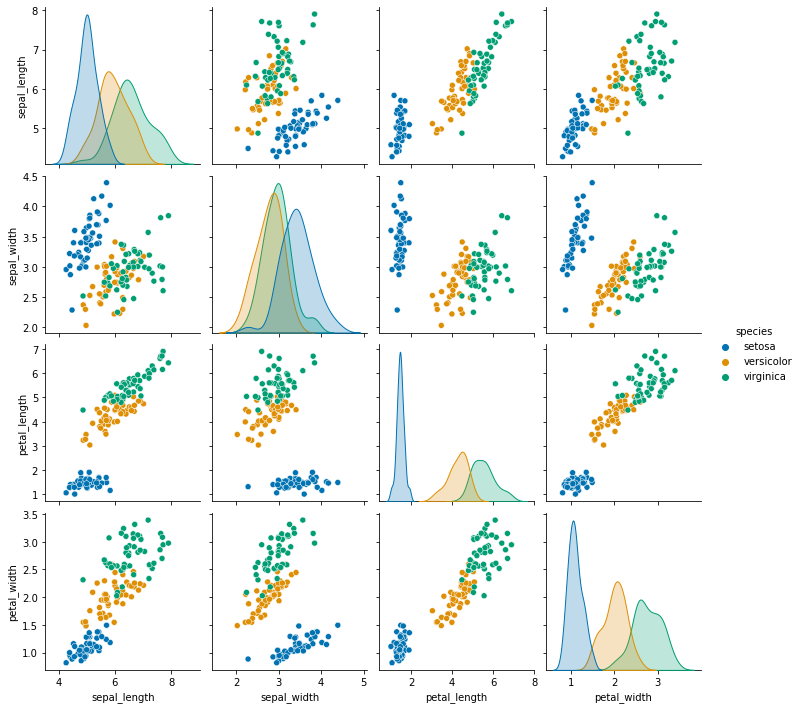

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
iris = pd.read_csv("iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

In [99]:
# sous-groupes d'iris
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

## DIAGRAMME DE DISPERSION

In [101]:
iris_setosa.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

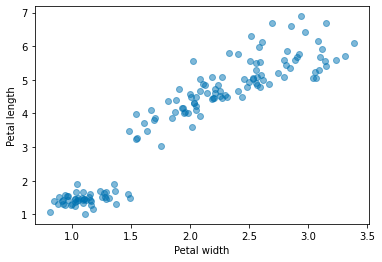

In [106]:
# diagramme de dispersion petal_width en fonction de petal_length
plt.plot(iris_dna['petal_width'],iris_dna['petal_length'],'o',alpha=0.5)
plt.xlabel("Petal width")
plt.ylabel("Petal length")
plt.show()

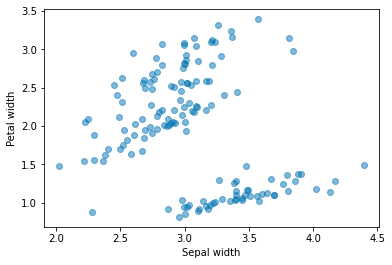

In [108]:
# diagramme de dispersion sepal_width en fonction de petal_width
plt.plot(iris_dna['sepal_width'],iris_dna['petal_width'],'o',alpha=0.5)
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.show()

## QUESTIONS

## QUESTION 1

In [ ]:
# Sur le dataframe iris_dna, calculez les coefficients de corrélation linéaires
# suivants :

In [175]:
# - petal_width en fonction de petal_length (x)
X = iris_dna["petal_length"]
y = iris_dna["petal_width"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# a, b = results.params['petal_length'], results.params['petal_width']
# print('a :', a)
print(results.params)
a=results.params['petal_length']
b=results.params['const']
print(results.summary())

const           0.509268
petal_length    0.385994
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1132.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           4.27e-70
Time:                        16:44:28   Log-Likelihood:               -0.37871
No. Observations:                 146   AIC:                             4.757
Df Residuals:                     144   BIC:                             10.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

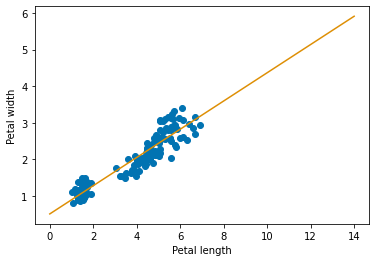

In [157]:
plt.plot(iris_dna["petal_length"],iris_dna["petal_width"], "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

In [177]:
# - sepal_width en fonction de petal_width (x)
X = iris_dna["petal_width"]
y = iris_dna["sepal_width"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# a, b = results.params['petal_length'], results.params['petal_width']
# print('a :', a)
print(results.params)
a=results.params['petal_width']
b=results.params['const']
print(results.summary())

const          3.351566
petal_width   -0.150201
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     9.435
Date:                Thu, 22 Oct 2020   Prob (F-statistic):            0.00255
Time:                        16:47:33   Log-Likelihood:                -81.808
No. Observations:                 146   AIC:                             167.6
Df Residuals:                     144   BIC:                             173.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

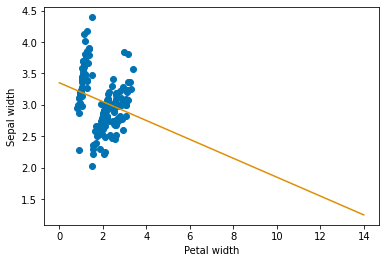

In [160]:
plt.plot(iris_dna["petal_width"],iris_dna["sepal_width"], "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Petal width")
plt.ylabel("Sepal width")
plt.show()

## QUESTION 2

In [180]:
# iris_setosa
# - sepal_width en fonction de petal_width (x)
X = iris_setosa["petal_width"]
y = iris_setosa["sepal_width"]
# X = sm.add_constant(X)
# X = np.vander(X, 2)
model = sm.OLS(y, X)
results = model.fit()
# a, b = results.params['petal_length'], results.params['petal_width']
# print('a :', a)
print(results.params)
# a=results.params['sepal_width']
# b=results.params['const']

petal_width    3.081309
dtype: float64


In [ ]:
coeffs = {
    "cas 1" : {'a': [...] , 'b':[...]},
    "cas 2" : {'a': [...] , 'b':[...]},
    "cas 3" : {'a': [...] , 'b':[...]},
    "cas 4" : {'a': [...] , 'b':[...]},
}
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        [...]
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
        
print(iris.loc[lignes_modifiees])


# <span class="bg-info">6.18. Repérez les différents types d'erreurs</span>

# <span class="bg-info">6.19. Traitez les valeurs manquantes, les outliers et les doublons</span>

## Les valeurs manquantes

### Ne rien faire

In [ ]:
# Ne rien faire et travailler avec un gruyère :
# si la proportion de valeurs manquantes est faibles, alors on peut les oublier 
# et ne rien faire : on laisse l'échantillon intact.

### Oublier une variable

In [ ]:
# si pour cette même variable, la proportion de valeurs manquantes est 
# beaucoup trop importante, mieux vaut l'oublier, à condition que la variable 
# ne soit pas trop importante pour l'analyse. Cela équivaut à ne pas considérer 
# une colonne dans le tableau du chapitre précédent.

### Oublier des individus

In [ ]:
# Si la variable qui contient des données manquantes est cruciale dans 
# l'analyse, alors mieux vaut créer un sous-échantillon et y supprimer les 
# individus pour lesquels cette variable est manquante

### Essayer de deviner quand même !

In [ ]:
# Deviner une valeur manquante s'appelle l'imputation.

### Deviner à partir d'autres variables

In [ ]:
# Pour remplacer une variable donnée, on peut regarder les autres variables 
# aux alentours.
# moyenne
# régression linéaire///

## Les outliers

In [182]:
# une valeur aberrante : c'est une valeur qui est manifestement fausse

In [184]:
# une valeur atypique : c'est une valeur qui "sort du lot", mais pas forcément
# fausse.

In [185]:
# moyenne très sensible aux outliers
# médiane peu sensible aux outliers

## Et les doublons ?

In [ ]:
# Il faut éliminer les doublons. 
# Cependant, il n’y a pas de règle précise pour les détecter : vous seuls 
# pouvez les détecter, à partir de la structure de vos données et en sachant 
# comment elles ont été collectées. Mais parfois, ce sera impossible.

# <span class="bg-info">6.20. TP : Nettoyez votre jeu de données</span>

In [197]:
import pandas as pd
import numpy as np
import re

## CHARGER LES DONNEES

In [198]:
data = pd.read_csv(data_path + 'personnes.csv')
# print(data)
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


## TRAITER LES PAYS

In [199]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne'
                  , 'USA']
                  
def check_country(country):
    if country not in VALID_COUNTRIES:
        print(' - "{}" n\'est pas un pays valide, nous le supprimons.' \
            .format(country))
        return np.NaN
    return country

## TRAITER LES EMAILS

In [200]:
# Fonction qui ne garde que le premier emais s'il en existe plusieurs
def first(string):
    parts = string.split(',') # liste des emails dans parts
    first_part = parts[0]
    if len(parts) >= 2:
        print(' - Il y a plusieurs parties dans "{}", ne gardons que {}.'\
            .format(parts,first_part))  
    return first_part

## TRAITER LES TAILLES

In [201]:
# Fonction qui transforme "1,34 m" en nombre décimal
def convert_height(height):
    found = re.search('\d\.\d{2}m', height)
    if found is None:
        print('{} n\'est pas au bon format. Il sera ignoré.'.format(height))
        return np.NaN
    else:
        value = height[:-1] # on enlève le dernier caractère, qui est 'm'
        return float(value)

In [202]:
# Fonction qui remplace les tailles manquantes par la moyenne des tailles 
#  de l'échantillon
def fill_height(height, replacement):
    if pd.isnull(height):
        print('Imputation par la moyenne : {}'.format(replacement))
        return replacement
    return height

## METTRE EN MINUSCULE

In [203]:
# Fonction mettre en minuscule
def lower_case(value): 
    print('Voici la valeur que je traite:', value)
    return value.lower()

# data['prenom_min'] = data['prenom'].apply(lower_case)

## APPLIQUER TOUTES CES FONCTIONS

In [204]:
# Traite les émails garde que le premier
data['email'] = data['email'].apply(first)
# Traite les pays en ne conservant que certains pays
data['pays'] = data['pays'].apply(check_country)
# Transforme les tailles '1.34 m' en décimal
data['taille'] = [convert_height(t) for t in data['taille']]
data['taille'] = [t if t<3 else np.NaN for t in data['taille']]
# Impute les tailles vides en remplaçant par la moyenne de l'échantillon
mean_height = data['taille'].mean()
data['taille'] = [fill_height(t, mean_height) for t in data['taille']]
# Transforme la date de naissance string en date DD/MM/YYYY
data['date_naissance'] = pd.to_datetime(data['date_naissance'], 
                                           format='%d/%m/%Y', errors='coerce')
# print(data)
data

 - Il y a plusieurs parties dans "['marco23@example.com', ' mc23@supermail.eu']", ne gardons que marco23@example.com.
 - "nan" n'est pas un pays valide, nous le supprimons.
 - "24" n'est pas un pays valide, nous le supprimons.
153cm n'est pas au bon format. Il sera ignoré.
Imputation par la moyenne : 1.52
Imputation par la moyenne : 1.52


,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.52
3,Marc,marco23@example.com,1978-02-10,France,1.65
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,1.52
6,samuël,samuel_329@example.com,NaT,Bénin,1.45
